<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-11 13:28:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  72.8MB/s    in 2.8s    

2025-09-11 13:28:41 (72.8 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 157.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.2 MB/s eta 0:00:00


In [3]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 151.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 147.3 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


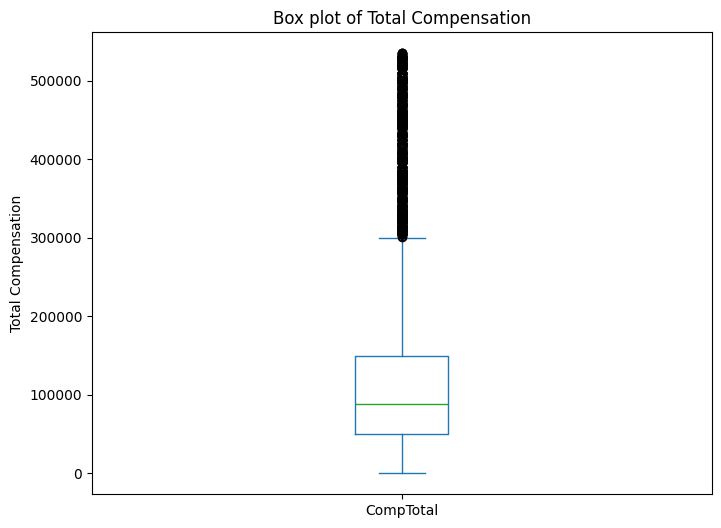

In [8]:
# your code goes here

# Load data
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
df = df.dropna(subset=['CompTotal'])

# Calculate Q1 and Q3
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering dataframe
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Visualize using box plot
df_no_outliers['CompTotal'].plot(kind='box', figsize=(8, 6)) 
plt.title('Box plot of Total Compensation') 
plt.ylabel('Total Compensation') 
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


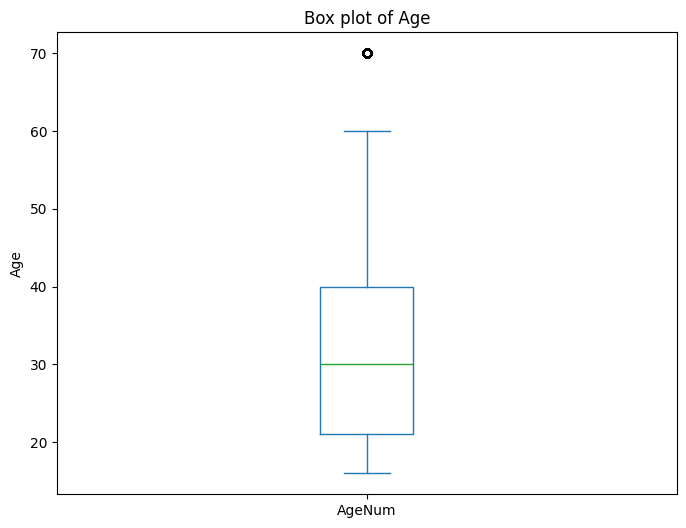

In [9]:
# your code goes here
import numpy as np 

df = pd.read_sql_query("SELECT Age FROM main", conn)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan  
}

# Apply mapping
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop NaN
df = df.dropna(subset=['Age'])

#Visualize using box plot
df['AgeNum'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Age')
plt.ylabel('Age')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


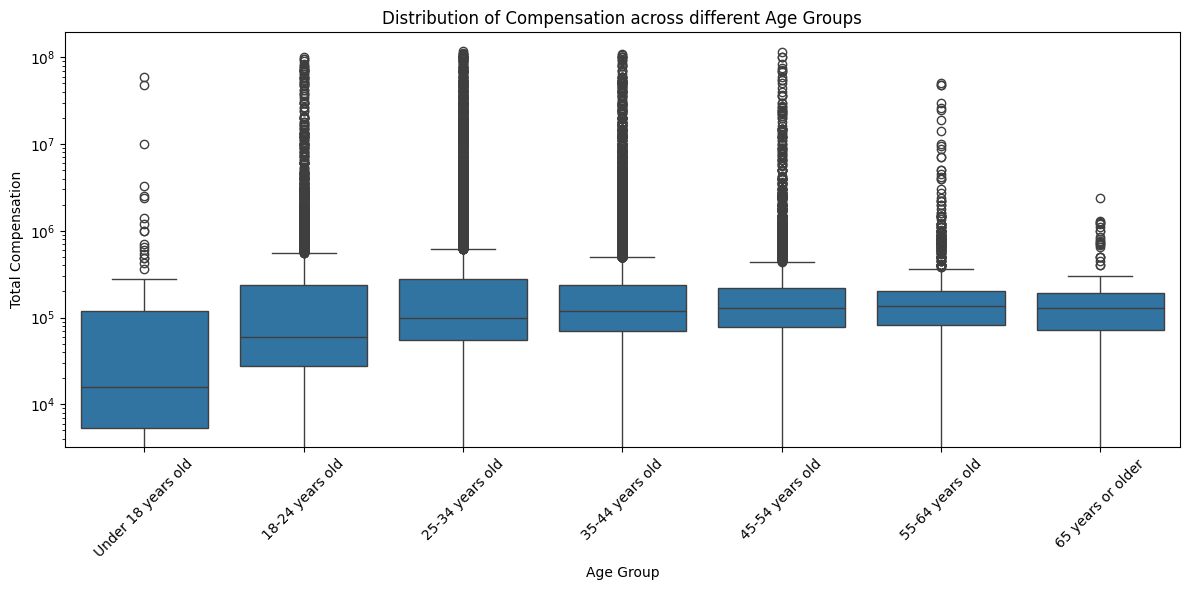

In [10]:
# your code goes here

# Load data
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)

# Drop missing values
df = df.dropna(subset=['Age', 'CompTotal'])

# Remove extreme outliers
q99 = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < q99]

# Ensure Age is properly ordered 
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='CompTotal')
plt.title('Distribution of Compensation across different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.yscale("log")
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


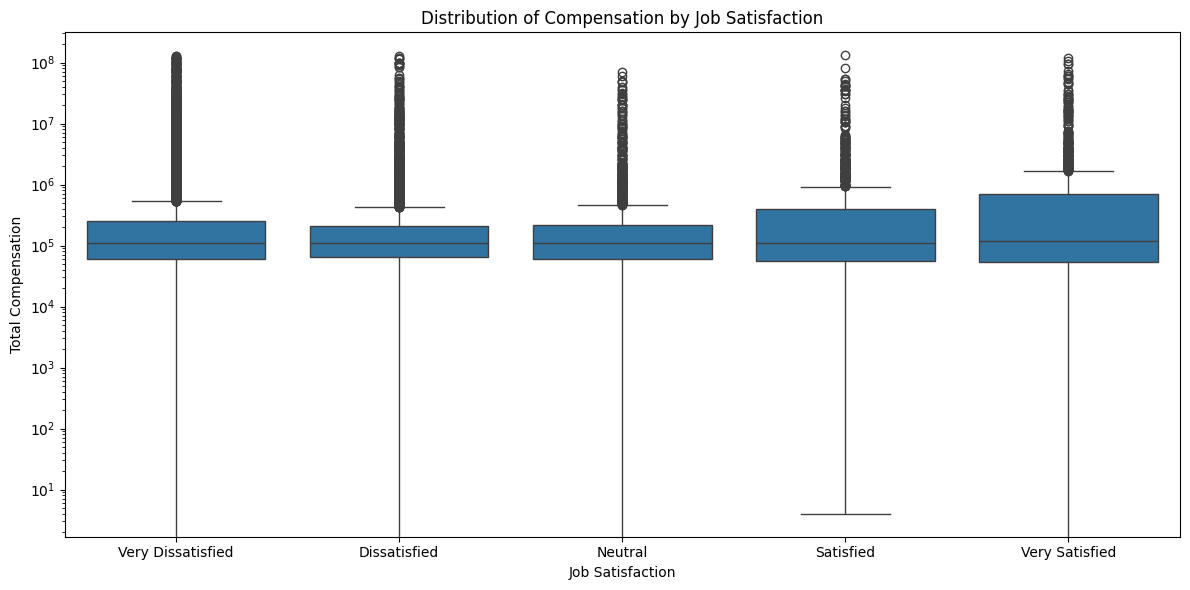

In [11]:
# your code goes here
# Load data
df = pd.read_sql_query("SELECT JobSatPoints_6, CompTotal FROM main", conn)

# Drop missing values
df = df.dropna(subset=['JobSatPoints_6', 'CompTotal'])

# Remove extreme outliers
q99 = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < q99]

# Define bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

# Apply binning
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Make it categorical
df['JobSatCategory'] = pd.Categorical(df['JobSatCategory'], categories=labels, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobSatCategory', y='CompTotal')
plt.title('Distribution of Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Total Compensation')
plt.yscale("log")
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


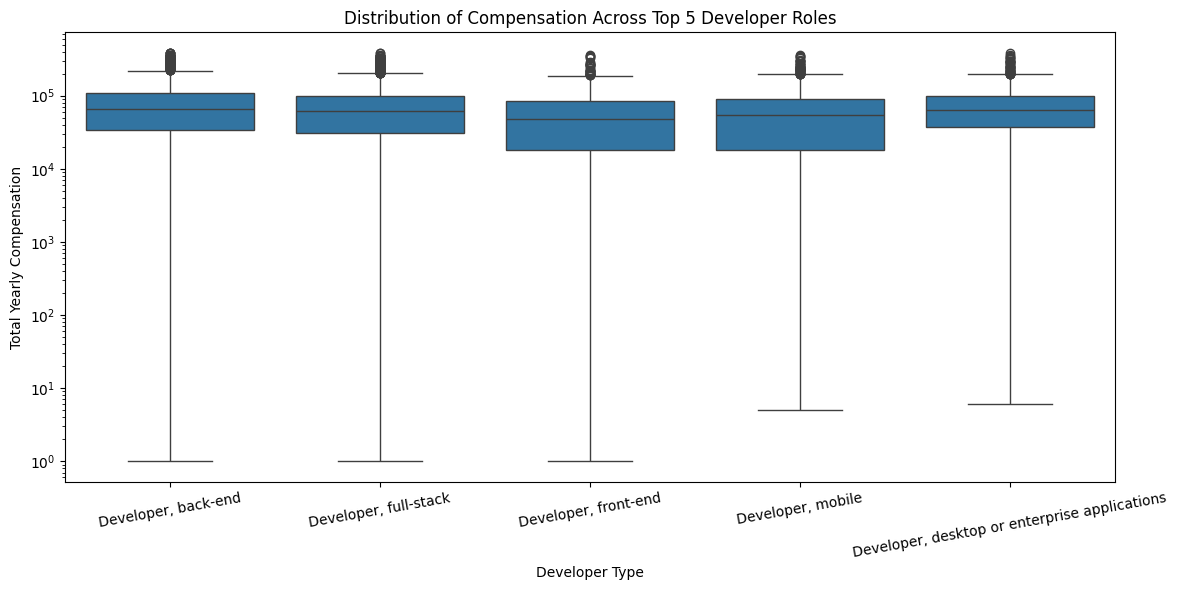

In [30]:
# your code goes here
df = pd.read_sql_query("SELECT DevType,ConvertedCompYearly FROM main", conn)

# Drop missing values
df = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# Remove extreme outliers
q99 = df['ConvertedCompYearly'].quantile(0.99)
df = df[df['ConvertedCompYearly'] < q99]

# Split DevType column and explode
df_exploded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Find top 5 most common DevTypes
top_dev_types = df_exploded['DevType'].value_counts().head(5).index.tolist()

# Filter to only top 5 DevTypes
df_top5 = df_exploded[df_exploded['DevType'].isin(top_dev_types)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly')
plt.title('Distribution of Annual Compensation Across Top 5 Developer Roles')
plt.xlabel('Developer Type')
plt.xticks(rotation=10)
plt.ylabel('Total Yearly Compensation')
plt.yscale("log")
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


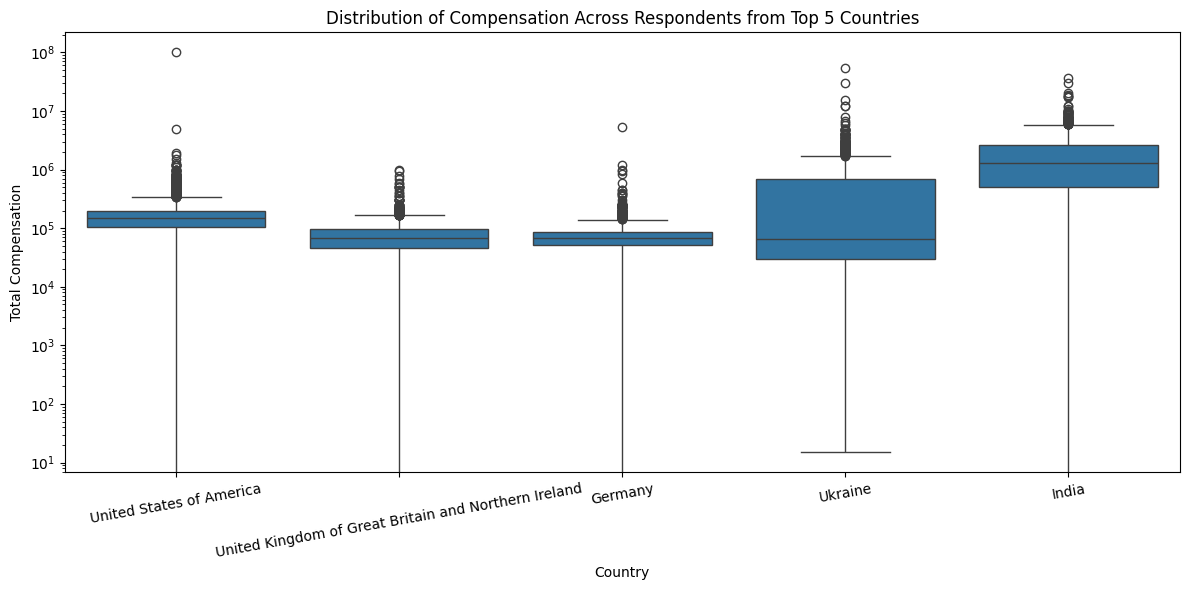

In [35]:
# your code goes here
df = pd.read_sql_query("SELECT Country,CompTotal FROM main", conn)

# Drop missing values
df = df.dropna(subset=['CompTotal', 'Country'])

# Remove extreme outliers
q99 = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < q99]

#Mapping Country names
mapping_dict = {
    "United States of America": "United States of America",
    "More than 50 years": 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_dict)

# Find top 5 countries
top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter only top 5 countries
df_top5 = df[df['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='Country', y='CompTotal')
plt.title('Distribution of Compensation Across Respondents from Top 5 Countries')
plt.xlabel('Country')
plt.xticks(rotation=10)
plt.ylabel('Total Compensation')
plt.yscale("log")
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


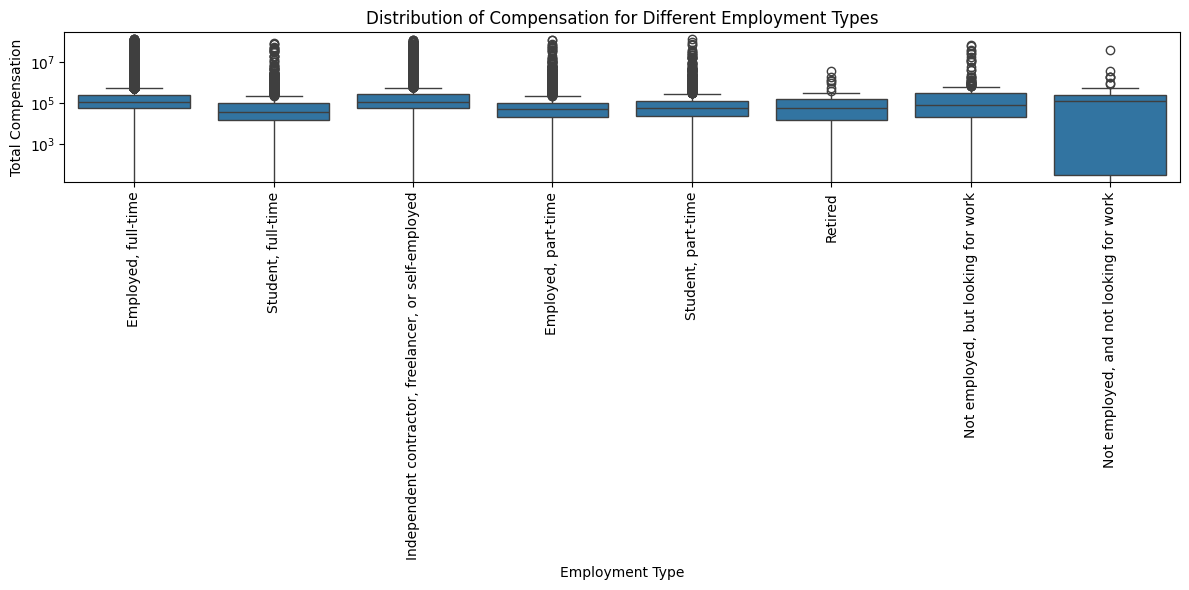

In [47]:
# your code goes here
# Load data
df = pd.read_sql_query("SELECT Employment, CompTotal FROM main", conn)

df = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

# Drop missing values
df = df.dropna(subset=['Employment', 'CompTotal'])

# Remove extreme outliers
q99 = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < q99]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Employment', y='CompTotal')
plt.title('Distribution of Compensation for Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


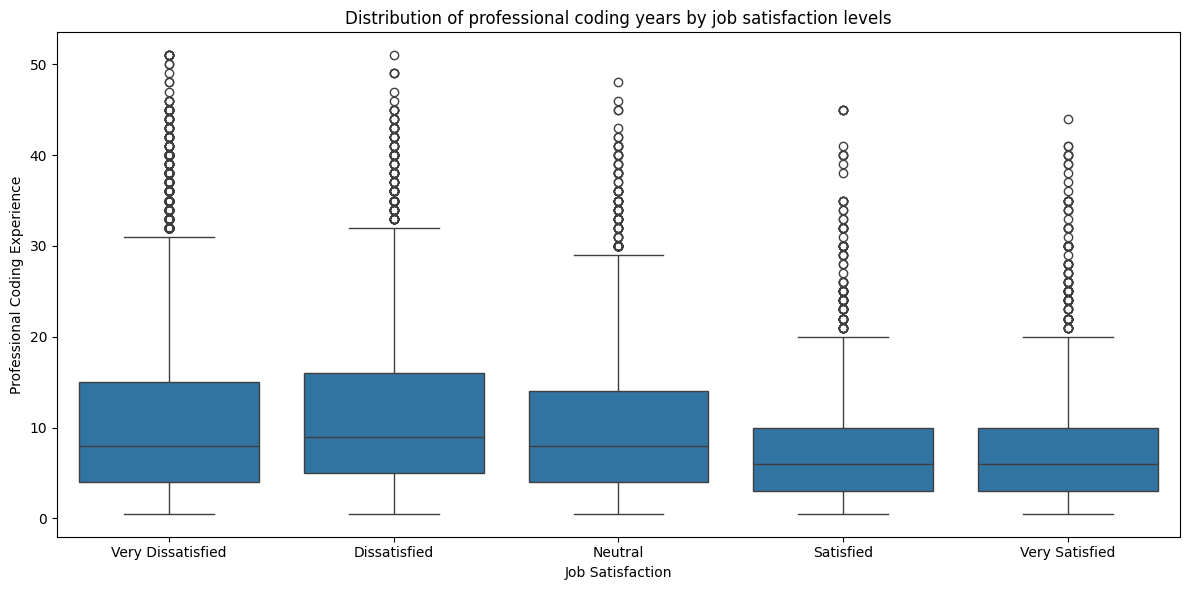

In [50]:
# your code goes here
# Load data
df = pd.read_sql_query("SELECT JobSatPoints_6, YearsCodePro FROM main", conn)

# Drop missing values
df = df.dropna(subset=['JobSatPoints_6', 'YearsCodePro'])

#Mapping YearsCodePro
mapping_dict = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_dict)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')


# Define bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

# Apply binning
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Make it categorical
df['JobSatCategory'] = pd.Categorical(df['JobSatCategory'], categories=labels, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobSatCategory', y='YearsCodePro')
plt.title('Distribution of professional coding years by job satisfaction levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Professional Coding Experience')
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
